# **Complex Networks 1ACC0202-2520-14091**
Descubrimiento de patrones de co-utilización en la red bipartita clientes–servicios
---

## **Trabajo Final**

### **Profesor:** Carlos Fernando Montoya Cubas

### **Grupo 7 | Integrantes**
| Nombre del Alumno                    |    Código      |
|--------------------------------------|----------------|
| Andrea Fabiana Garcia Napuri         | u202014068     |
| Nikole Scarlet Garcia Chavez         | u20181b618     |
| Luis Isaac Lazaro Machado    | u202323591     |  

### Link video: https://www.youtube.com/watch?v=IALAZSU-WDg

## **Introducción**

El análisis de redes permite representar y comprender las conexiones que surgen dentro de un sistema cuando distintos elementos interactúan entre sí. En este trabajo, se modela la relación entre clientes y servicios como una red bipartita, con el fin de identificar patrones de co-utilización y relaciones de complementariedad entre los servicios. A través de esta estructura, es posible observar cómo ciertos servicios actúan como puntos de enlace entre varios clientes, mientras que otros mantienen una participación más limitada, revelando diferencias en su nivel de conexión y alcance dentro del sistema.
La proyección de la red hacia el nivel servicio–servicio permite estudiar cómo las relaciones entre servicios configuran una estructura compleja, donde algunos actúan como nodos centrales o “puentes” que facilitan la conexión entre distintas partes del sistema. Esta dinámica refleja propiedades típicas de redes reales, como la existencia de servicios con alta concentración de vínculos o la formación de comunidades que agrupan servicios utilizados en conjunto. Asimismo, el análisis de estas conexiones contribuye a entender la difusión de interacciones dentro de la red y su resiliencia ante posibles cambios o pérdidas de enlaces.
El objetivo general de este trabajo es identificar y analizar los patrones de co-utilización entre servicios a partir de una red bipartita cliente–servicio y su proyección servicio–servicio. Para ello, se plantean los siguientes objetivos específicos:
- Construir la red bipartita cliente–servicio y proyectarla a una red servicio–servicio.
- Aplicar métricas globales y locales para describir la estructura de la red y las relaciones entre servicios.
- Detectar comunidades o agrupaciones de servicios con alta co-utilización.
- Interpretar los resultados en función de las propiedades estructurales observadas, identificando los servicios más conectados y las posibles relaciones de complementariedad.


## **1. DATASET: EDA**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('datosRed.xlsx')
print(df.head())
print("\nInformacion de la data: ")
print(df.info())
print("\nDescripcion estadistica: ")
print(df.describe())

    AÑO PERSONA TIPO DE SERVICIO NOMBRE DE LA TAREA   MODALIDAD COMPLEJIDAD
0  2019    ID_1           SERV_1          TAREA_1.1  PRESENCIAL        BAJA
1  2019    ID_2           SERV_1          TAREA_1.1  PRESENCIAL        BAJA
2  2019    ID_3           SERV_1          TAREA_1.1  PRESENCIAL        BAJA
3  2019    ID_4           SERV_1          TAREA_1.1  PRESENCIAL        BAJA
4  2019    ID_5           SERV_1          TAREA_1.1  PRESENCIAL        BAJA

Informacion de la data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AÑO                 10384 non-null  int64 
 1   PERSONA             10384 non-null  object
 2   TIPO DE SERVICIO    10384 non-null  object
 3   NOMBRE DE LA TAREA  10384 non-null  object
 4   MODALIDAD           10384 non-null  object
 5   COMPLEJIDAD         10384 non-null  object
dtypes: int64(1), object(5

Verificamos valores únicos

In [2]:
print("Valores únicos en MODALIDAD:")
print(df['MODALIDAD'].unique())

print("\nValores únicos en COMPLEJIDAD:")
print(df['COMPLEJIDAD'].unique())

print("\nValores únicos en NOMBRE DE LA TAREA:")
print(df['NOMBRE DE LA TAREA'].unique())

print("\nValores únicos en TIPO DE SERVICIO:")
print(df['TIPO DE SERVICIO'].unique())

print("\nValores únicos en AÑO:")
print(df['AÑO'].unique())

print("\nValores únicos en PERSONA:")
print(df['PERSONA'].unique())

Valores únicos en MODALIDAD:
['PRESENCIAL' 'VIRTUAL']

Valores únicos en COMPLEJIDAD:
['BAJA' 'MEDIANA' 'ALTA']

Valores únicos en NOMBRE DE LA TAREA:
['TAREA_1.1' 'TAREA_2.1' 'TAREA_3.1' 'TAREA_4.1' 'TAREA_5.1' 'TAREA_2.2'
 'TAREA_4.2' 'TAREA_1.2' 'TAREA_6.1' 'TAREA_7.1' 'TAREA_4.3' 'TAREA_3.2'
 'TAREA_3.3' 'TAREA_5.2' 'TAREA_4.4' 'TAREA_3.4' 'TAREA_5.3' 'TAREA_1.3']

Valores únicos en TIPO DE SERVICIO:
['SERV_1' 'SERV_2' 'SERV_3' 'SERV_4' 'SERV_5' 'SERV_6' 'SERV_7']

Valores únicos en AÑO:
[2019 2020 2021 2022 2023 2024]

Valores únicos en PERSONA:
['ID_1' 'ID_2' 'ID_3' ... 'ID_5088' 'ID_5089' 'ID_5090']


Verificamos duplicados


In [3]:
print("Duplicados totales:", df.duplicated().sum())

Duplicados totales: 2429


Eliminamos duplicados

In [4]:
df = df.drop_duplicates()

Verificamos nuevamente

In [5]:
print("Duplicados totales:", df.duplicated().sum())

Duplicados totales: 0


In [6]:
print("Cantidad total de registros ahora:", len(df))

Cantidad total de registros ahora: 7955


Distribución por Año

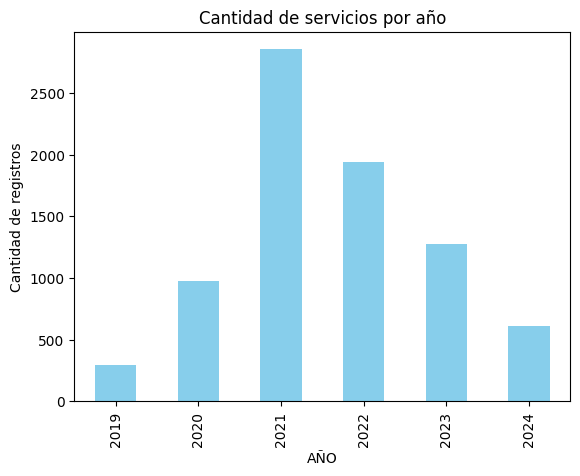

In [7]:
import matplotlib.pyplot as plt
df['AÑO'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Cantidad de servicios por año")
plt.xlabel("AÑO")
plt.ylabel("Cantidad de registros")
plt.show()

###Distribución del Tipo de Servicio

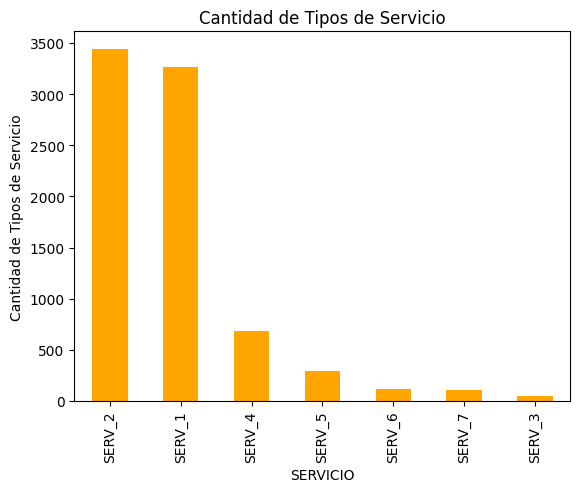

In [ ]:
df['TIPO DE SERVICIO'].value_counts().plot(kind='bar', color='orange')
plt.title("Cantidad de Tipos de Servicio")
plt.xlabel("SERVICIO")
plt.ylabel("Cantidad de Tipos de Servicio")
plt.show()

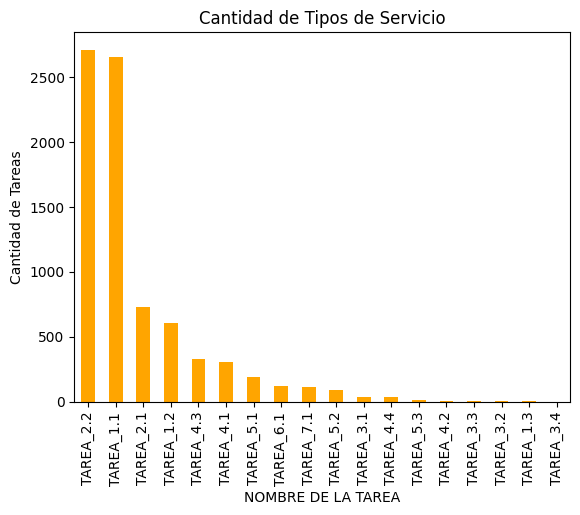

In [ ]:
df['NOMBRE DE LA TAREA'].value_counts().plot(kind='bar', color='orange')
plt.title("Cantidad de Tipos de Servicio")
plt.xlabel("NOMBRE DE LA TAREA")
plt.ylabel("Cantidad de Tareas")
plt.show()


###Distribución por Modalidad

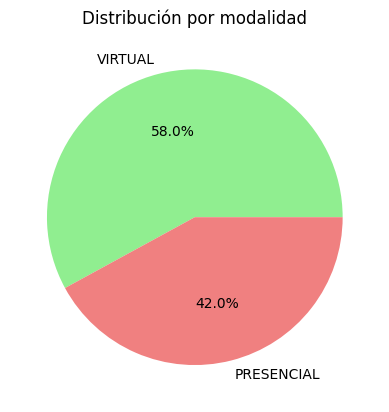

In [ ]:
df['MODALIDAD'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['lightgreen', 'lightcoral']
)
plt.title("Distribución por modalidad")
plt.ylabel('')  # Quita la etiqueta vertical
plt.show()

###Distribución por Complejidad

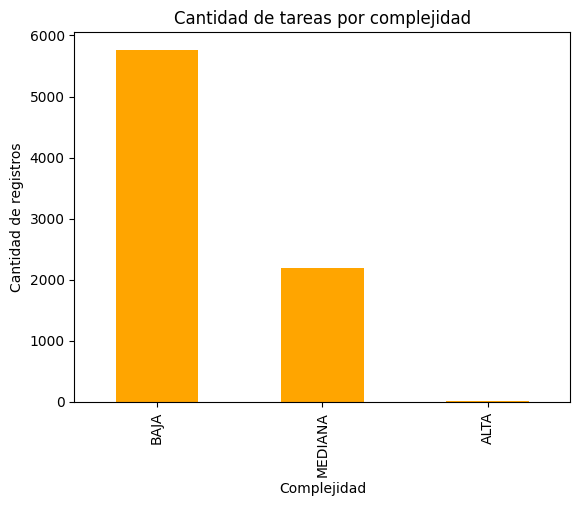

In [ ]:
df['COMPLEJIDAD'].value_counts().plot(kind='bar', color='orange')
plt.title("Cantidad de tareas por complejidad")
plt.xlabel("Complejidad")
plt.ylabel("Cantidad de registros")
plt.show()

###Revisión de datos luego de la limpieza

In [8]:
# Para variable numérica (AÑO)
print("Resumen de AÑO:")
print(df['AÑO'].describe())

# Para variables categóricas
print("\nConteo por MODALIDAD:")
print(df['MODALIDAD'].value_counts())

print("\nConteo por COMPLEJIDAD:")
print(df['COMPLEJIDAD'].value_counts())

print("\nConteo por TIPO DE SERVICIO:")
print(df['TIPO DE SERVICIO'].value_counts().head(10))  # solo los 10 más frecuentes

print("\nConteo por NOMBRE DE LA TAREA:")
print(df['NOMBRE DE LA TAREA'].value_counts().head(10))  # solo los 10 más frecuentes


Resumen de AÑO:
count    7955.000000
mean     2021.597234
std         1.221895
min      2019.000000
25%      2021.000000
50%      2021.000000
75%      2022.000000
max      2024.000000
Name: AÑO, dtype: float64

Conteo por MODALIDAD:
MODALIDAD
VIRTUAL       4610
PRESENCIAL    3345
Name: count, dtype: int64

Conteo por COMPLEJIDAD:
COMPLEJIDAD
BAJA       5764
MEDIANA    2184
ALTA          7
Name: count, dtype: int64

Conteo por TIPO DE SERVICIO:
TIPO DE SERVICIO
SERV_2    3441
SERV_1    3260
SERV_4     681
SERV_5     295
SERV_6     119
SERV_7     111
SERV_3      48
Name: count, dtype: int64

Conteo por NOMBRE DE LA TAREA:
NOMBRE DE LA TAREA
TAREA_2.2    2709
TAREA_1.1    2653
TAREA_2.1     732
TAREA_1.2     604
TAREA_4.3     331
TAREA_4.1     306
TAREA_5.1     188
TAREA_6.1     119
TAREA_7.1     111
TAREA_5.2      91
Name: count, dtype: int64


###Analizando Cliente-Servicio

In [9]:
personas_servicios = df.groupby('PERSONA')['TIPO DE SERVICIO'].nunique()
print(personas_servicios.describe())

count    5090.000000
mean        1.237917
std         0.609882
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: TIPO DE SERVICIO, dtype: float64


###Gráfica Cliente-Servicio

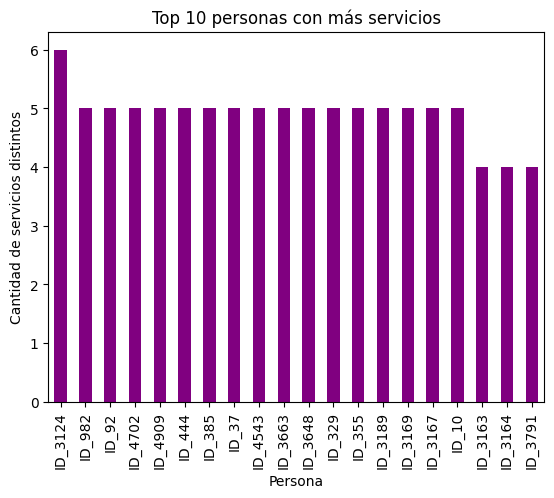

In [10]:
top_personas = personas_servicios.sort_values(ascending=False).head(20)
top_personas.plot(kind='bar', color='purple')
plt.title("Top 10 personas con más servicios")
plt.xlabel("Persona")
plt.ylabel("Cantidad de servicios distintos")
plt.show()

###Boxplot de Complejidad por Año

<Axes: xlabel='COMPLEJIDAD', ylabel='AÑO'>

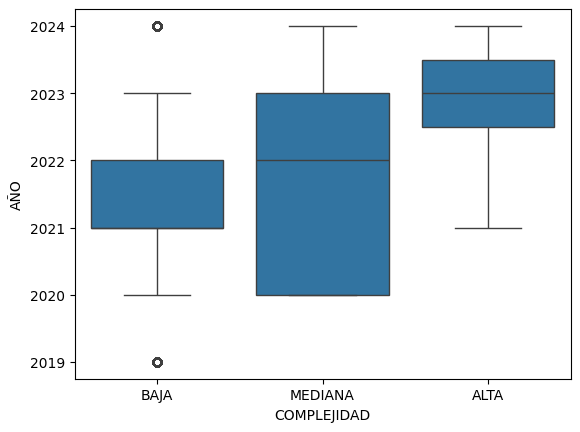

In [ ]:
import seaborn as sns
sns.boxplot(x='COMPLEJIDAD', y='AÑO', data=df)

###Countplot de Año por Modalidad

<Axes: xlabel='AÑO', ylabel='count'>

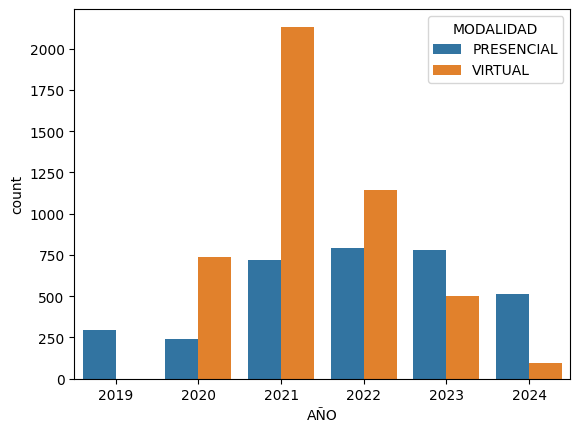

In [ ]:
sns.countplot(x='AÑO', hue='MODALIDAD', data=df)

###Countplot de Complejidad por Modalidad

<Axes: xlabel='COMPLEJIDAD', ylabel='count'>

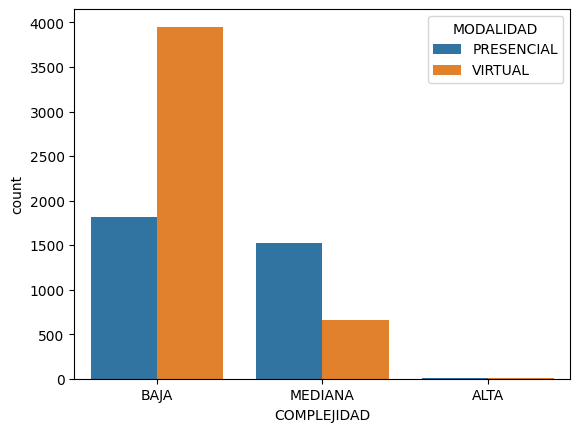

In [ ]:
sns.countplot(x='COMPLEJIDAD', hue='MODALIDAD', data=df)

###Countplot de Tipo de Servicio por Complejidad

<Axes: xlabel='TIPO DE SERVICIO', ylabel='count'>

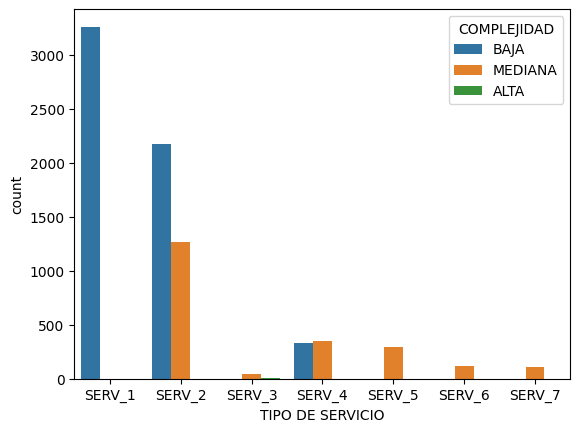

In [ ]:
sns.countplot(x='TIPO DE SERVICIO', hue='COMPLEJIDAD', data=df)


###Diagrama de Correlación

Convertimos a numérico la complejidad

In [ ]:
mapa_complejidad = {'BAJA': 1, 'MEDIA': 2, 'ALTA': 3}
df['COMPLEJIDAD_NUM'] = df['COMPLEJIDAD'].map(mapa_complejidad)

df_resumen = df.groupby('PERSONA', as_index=False).agg({
    'TIPO DE SERVICIO': 'nunique',   # cuántos servicios distintos usa cada persona
    'NOMBRE DE LA TAREA': 'nunique', # cuántas tareas distintas tiene
    'COMPLEJIDAD_NUM': 'mean',       # nivel promedio de complejidad
    'AÑO': 'mean'                    # año promedio de actividad
})

Graficamos el Diagrama

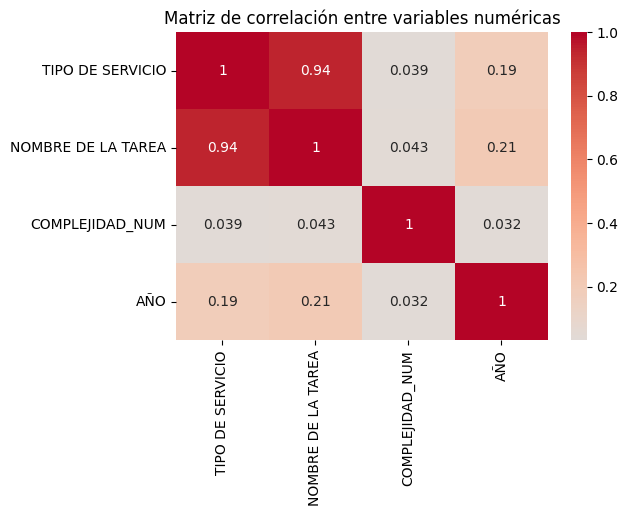

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula correlación solo entre columnas numéricas
corr = df_resumen[['TIPO DE SERVICIO', 'NOMBRE DE LA TAREA', 'COMPLEJIDAD_NUM', 'AÑO']].corr()

# Mostrarla
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

###Relación tipo Servicio, tarea y complejidad

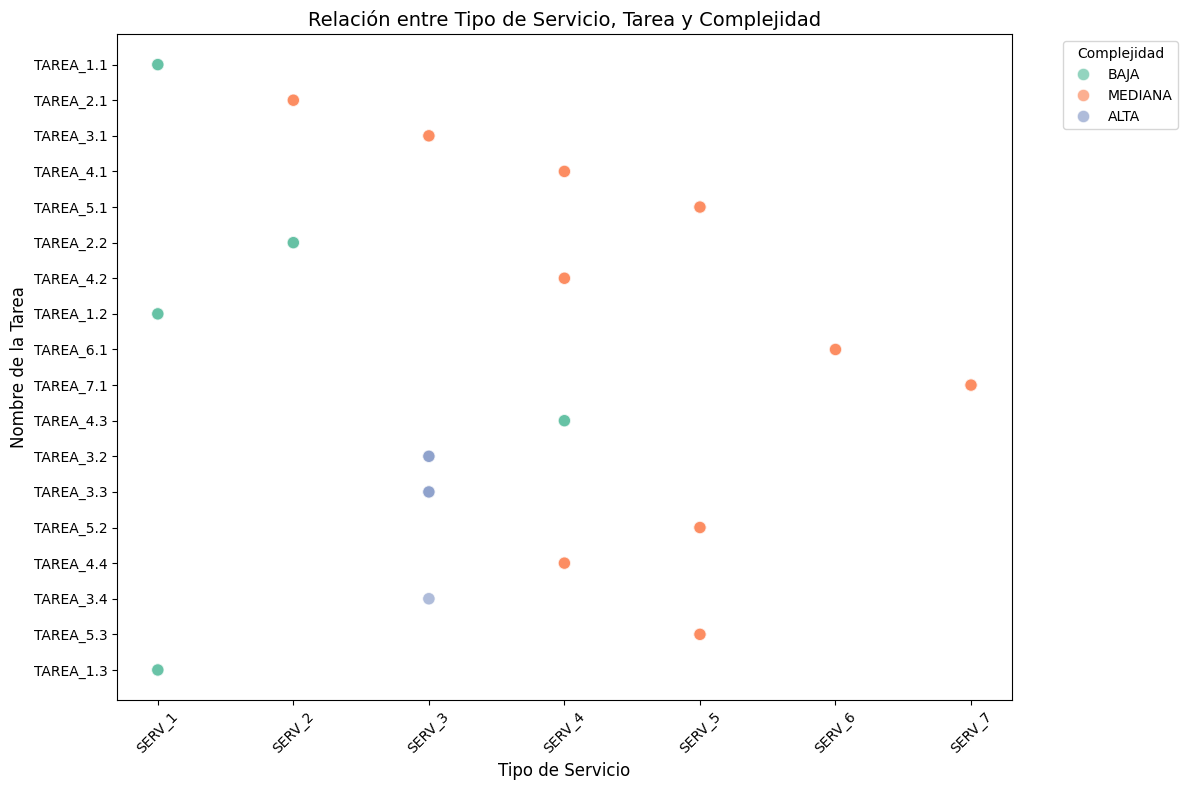

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Paso 1: Convertimos la complejidad en números o categorías ordenadas
mapa = {'BAJA': 1, 'MEDIANA': 2, 'ALTA': 3}
df['COMPLEJIDAD_NUM'] = df['COMPLEJIDAD'].map(mapa)

# Paso 2: Creamos el gráfico
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df,
    x='TIPO DE SERVICIO',
    y='NOMBRE DE LA TAREA',
    hue='COMPLEJIDAD',       # color según complejidad original
    palette={'BAJA': '#66c2a5', 'MEDIANA': '#fc8d62', 'ALTA': '#8da0cb'},
    alpha=0.7,
    s=80                     # tamaño de los puntos
)

# Paso 3: Ajustes visuales
plt.title('Relación entre Tipo de Servicio, Tarea y Complejidad', fontsize=14)
plt.xlabel('Tipo de Servicio', fontsize=12)
plt.ylabel('Nombre de la Tarea', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Complejidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## **2. RED: Construcción de la red**

Objetivo: Construir y analizar una red bipartita cliente–servicio y su proyección a servicio–servicio, considerando:

- Tipo de red
- Criterios de enlace
- Ventanas temporales (por año)

### 2.1. Tipo de red: Bipartita cliente–servicio

- Nodos tipo 1: PERSONA (clientes)
- Nodos tipo 2: TIPO DE SERVICIO (servicios)
- Enlace: un cliente utiliza un servicio

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite
import pickle
import os

In [13]:
B = nx.Graph()
clientes = df["PERSONA"].unique()
servicios = df["TIPO DE SERVICIO"].unique()

B.add_nodes_from(clientes, bipartite=0)
B.add_nodes_from(servicios, bipartite=1)
B.add_edges_from(zip(df["PERSONA"], df["TIPO DE SERVICIO"]))

print("Red bipartita creada:")
print(f" - Nodos totales: {B.number_of_nodes()}")
print(f" - Enlaces totales: {B.number_of_edges()}")

Red bipartita creada:
 - Nodos totales: 5097
 - Enlaces totales: 6301


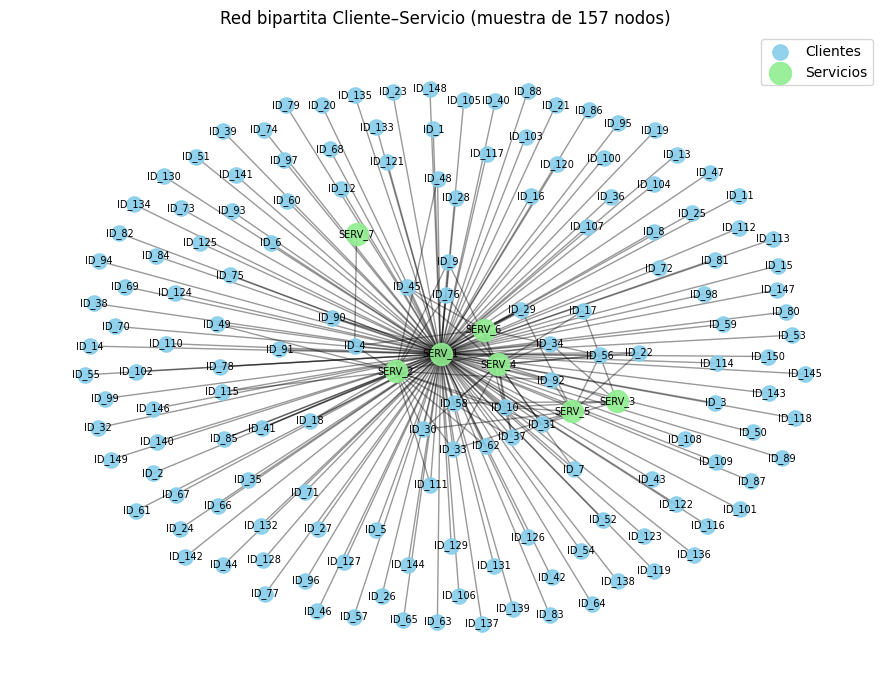

Figura guardada en: figuras/bipartita/red_bipartita_cliente_servicio_muestra.png


In [14]:
# Visualización de una submuestra de la red bipartita

# Número de clientes y servicios a mostrar (ajusta según tamaño)
num_clientes_muestra = 150
num_servicios_muestra = 150

# Selecciona una muestra de ambos tipos
clientes_muestra = list(clientes)[:num_clientes_muestra]
servicios_muestra = list(servicios)[:num_servicios_muestra]

# Incluye solo las conexiones entre ellos
nodos_muestra = clientes_muestra + servicios_muestra
B_sub = B.subgraph(nodos_muestra).copy()

# Layout bipartito para mayor claridad
pos_sub = nx.spring_layout(B_sub, seed=42, k=0.6)

# Crear carpeta si no existe
carpeta_fig_bipartita = os.path.join("figuras", "bipartita")
os.makedirs(carpeta_fig_bipartita, exist_ok=True)

# Dibujo
plt.figure(figsize=(9, 7))
nx.draw_networkx_nodes(B_sub, pos_sub, nodelist=clientes_muestra,
                       node_color='skyblue', node_size=120, label='Clientes', alpha=0.9)
nx.draw_networkx_nodes(B_sub, pos_sub, nodelist=servicios_muestra,
                       node_color='lightgreen', node_size=250, label='Servicios', alpha=0.9)
nx.draw_networkx_edges(B_sub, pos_sub, alpha=0.4)
nx.draw_networkx_labels(B_sub, pos_sub, font_size=7)

plt.title(f"Red bipartita Cliente–Servicio (muestra de {len(B_sub.nodes())} nodos)")
plt.legend(scatterpoints=1)
plt.axis('off')
plt.tight_layout()

# Guardar figura
ruta_figura = os.path.join(carpeta_fig_bipartita, "red_bipartita_cliente_servicio_muestra.png")
plt.savefig(ruta_figura, dpi=300, bbox_inches="tight")
plt.show()

print(f"Figura guardada en: {ruta_figura}")

###2.2. Criterios de enlace: Proyección servicio–servicio

- Criterio: Dos servicios estarán conectados si al menos un cliente ha utilizado ambos servicios.
- Tipo de red resultante: ponderada (por número de clientes en común).

In [15]:
servicios_set = {n for n, d in B.nodes(data=True) if d["bipartite"] == 1}
G_servicios = bipartite.weighted_projected_graph(B, servicios_set)

print("Red servicio–servicio (completa):")
print(f" - Nodos: {G_servicios.number_of_nodes()}")
print(f" - Enlaces: {G_servicios.number_of_edges()}")

Red servicio–servicio (completa):
 - Nodos: 7
 - Enlaces: 20


Filtrado por peso para eliminar enlaces débiles

In [16]:
umbral = 20  # se puede ajustar este valor según densidad
G_servicios_filtrada = nx.Graph(
    ((u, v, d) for u, v, d in G_servicios.edges(data=True) if d.get("weight", 0) >= umbral)
)

print(f"Red servicio–servicio (filtrada, peso >= {umbral}):")
print(f" - Nodos: {G_servicios_filtrada.number_of_nodes()}")
print(f" - Enlaces: {G_servicios_filtrada.number_of_edges()}")

Red servicio–servicio (filtrada, peso >= 20):
 - Nodos: 5
 - Enlaces: 10


Visualización comparativa

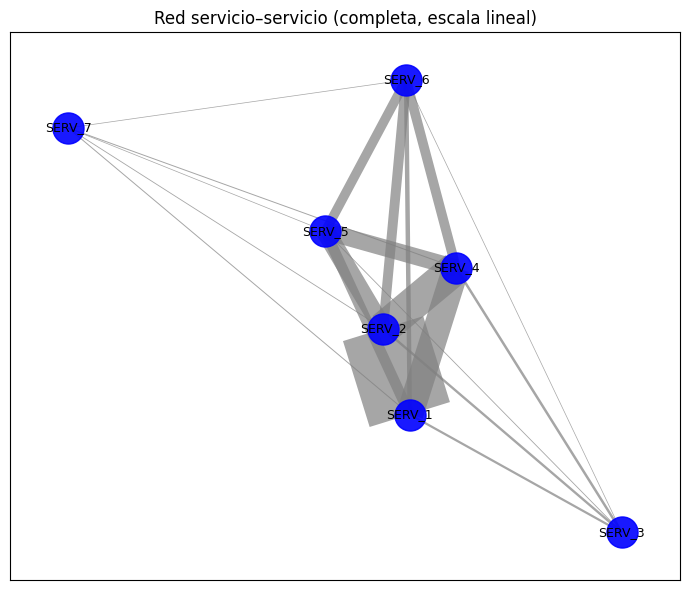

Figura guardada en: figuras/servicios/completa/red_servicio_servicio_completa_lineal.png


In [17]:
# Crear carpeta si no existe
carpeta_fig_servicios = os.path.join("figuras", "servicios", "completa")
os.makedirs(carpeta_fig_servicios, exist_ok=True)

# Layout y pesos
plt.figure(figsize=(7, 6))
pos_full = nx.spring_layout(G_servicios, seed=42, k=0.4)
edge_weights_full = [d.get("weight", 1) for _, _, d in G_servicios.edges(data=True)]
edge_widths_full = [max(0.5, w * 0.1) for w in edge_weights_full]  # Escala lineal

# Dibujo
nx.draw_networkx_nodes(G_servicios, pos_full, node_size=500, node_color="blue", alpha=0.9)
nx.draw_networkx_edges(G_servicios, pos_full, width=edge_widths_full, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G_servicios, pos_full, font_size=9)

plt.title("Red servicio–servicio (completa, escala lineal)")
plt.tight_layout()

# Guardar figura antes de mostrar
ruta_figura_servicios = os.path.join(carpeta_fig_servicios, "red_servicio_servicio_completa_lineal.png")
plt.savefig(ruta_figura_servicios, dpi=300, bbox_inches='tight')

plt.show()
plt.close()

print(f"Figura guardada en: {ruta_figura_servicios}")

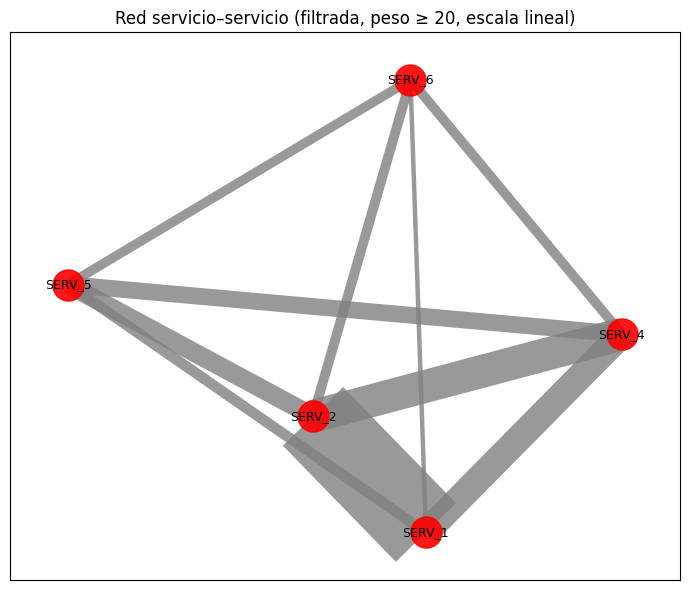

Figura guardada en: figuras/servicios/filtrada/red_servicio_servicio_filtrada_lineal.png


In [18]:
# Red servicio–servicio (filtrada, escala lineal)
# Crear carpetas si no existen
carpeta_base = os.path.join("figuras", "servicios", "filtrada")
os.makedirs(carpeta_base, exist_ok=True)

# Layout y pesos
plt.figure(figsize=(7, 6))
pos_filt = {n: pos_full[n] for n in G_servicios_filtrada.nodes() if n in pos_full}

edge_weights_filt = [d.get("weight", 1) for _, _, d in G_servicios_filtrada.edges(data=True)]
edge_widths_filt = [max(0.5, w * 0.1) for w in edge_weights_filt]  # Escala lineal

# Dibujo
nx.draw_networkx_nodes(G_servicios_filtrada, pos_filt, node_size=500, node_color="red", alpha=0.9)
nx.draw_networkx_edges(G_servicios_filtrada, pos_filt, width=edge_widths_filt, edge_color="gray", alpha=0.8)
nx.draw_networkx_labels(G_servicios_filtrada, pos_filt, font_size=9)

plt.title(f"Red servicio–servicio (filtrada, peso ≥ {umbral}, escala lineal)")
plt.tight_layout()

# Guardar figura
ruta_figura_filt_lineal = os.path.join(carpeta_base, "red_servicio_servicio_filtrada_lineal.png")
plt.savefig(ruta_figura_filt_lineal, dpi=300, bbox_inches='tight')

plt.show()
plt.close()

print(f"Figura guardada en: {ruta_figura_filt_lineal}")

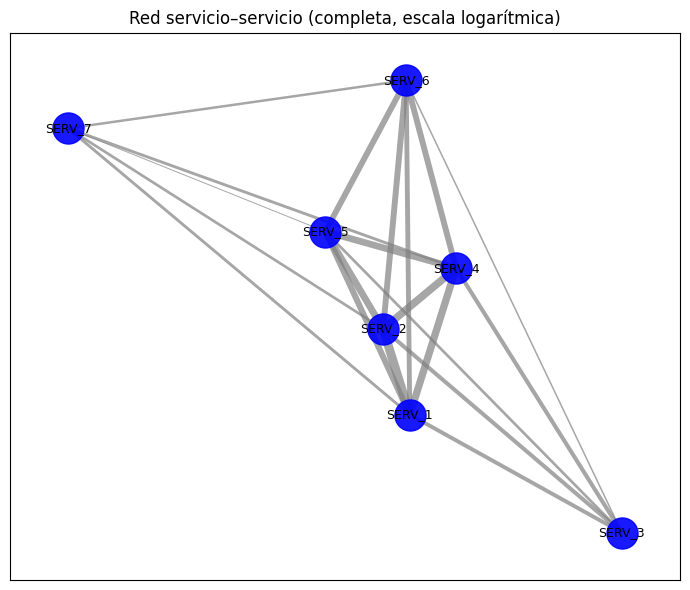

Figura guardada en: figuras/servicios/completa/red_servicio_servicio_completa_log.png


In [19]:
# Red servicio–servicio (completa, escala logarítmica)

carpeta_fig_servicios = os.path.join("figuras", "servicios", "completa")
os.makedirs(carpeta_fig_servicios, exist_ok=True)

plt.figure(figsize=(7, 6))
edge_widths_full_log = [np.log1p(w) for w in edge_weights_full]  # Escala log(1+w)
nx.draw_networkx_nodes(G_servicios, pos_full, node_size=500, node_color="blue", alpha=0.9)
nx.draw_networkx_edges(G_servicios, pos_full, width=edge_widths_full_log, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G_servicios, pos_full, font_size=9)

plt.title("Red servicio–servicio (completa, escala logarítmica)")
plt.tight_layout()

# Guardar figura
ruta_figura_servicios = os.path.join(carpeta_fig_servicios, "red_servicio_servicio_completa_log.png")
plt.savefig(ruta_figura_servicios, dpi=300, bbox_inches='tight')

plt.show()
plt.close()
print(f"Figura guardada en: {ruta_figura_servicios}")

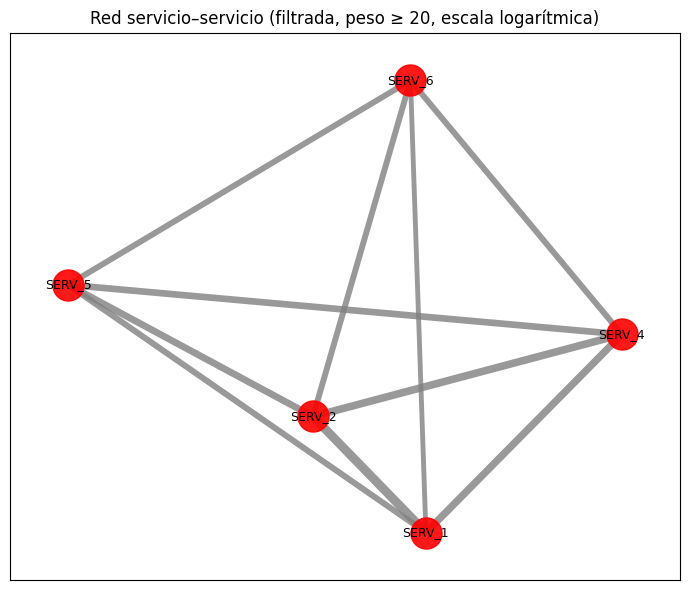

Figura guardada en: figuras/servicios/completa/red_servicio_servicio_completa_log.png


In [20]:
# Red servicio–servicio (filtrada, escala logarítmica)
carpeta_base = os.path.join("figuras", "servicios", "filtrada")
os.makedirs(carpeta_base, exist_ok=True)

plt.figure(figsize=(7, 6))
edge_widths_filt_log = [np.log1p(w) for w in edge_weights_filt]

nx.draw_networkx_nodes(G_servicios_filtrada, pos_filt, node_size=500, node_color="red", alpha=0.9)
nx.draw_networkx_edges(G_servicios_filtrada, pos_filt, width=edge_widths_filt_log, edge_color="gray", alpha=0.8)
nx.draw_networkx_labels(G_servicios_filtrada, pos_filt, font_size=9)

plt.title(f"Red servicio–servicio (filtrada, peso ≥ {umbral}, escala logarítmica)")
plt.tight_layout()

# Guardar figura
ruta_figura_filt_lineal = os.path.join(carpeta_base, "red_servicio_servicio_filtrada_log.png")
plt.savefig(ruta_figura_filt_lineal, dpi=300, bbox_inches='tight')

plt.show()
plt.close()
print(f"Figura guardada en: {ruta_figura_servicios}")

En la versión con peso lineal, los valores representan directamente la fuerza real de las conexiones, pero como los pesos varían bastante (de 2 a 605), las aristas más grandes dominan el gráfico y las más pequeñas casi no se notan. Por eso, decidimos incorporar también una versión con escala logarítmica, que reduce esas diferencias y permite visualizar mejor la estructura general de la red, mostrando más conexiones y haciendo que el gráfico sea más fácil de interpretar. La única desventaja es que los valores ya no reflejan el peso real, sino su logaritmo.

### 2.3. Ventanas temporales (por año)

- Se construyen redes bipartitas y proyecciones por año para estudiar cambios en el tiempo.

In [21]:
redes_por_año = {}
for año, grupo in df.groupby("AÑO"):
    B_año = nx.Graph()
    clientes_año = grupo["PERSONA"].unique()
    servicios_año = grupo["TIPO DE SERVICIO"].unique()

    B_año.add_nodes_from(clientes_año, bipartite=0)
    B_año.add_nodes_from(servicios_año, bipartite=1)
    B_año.add_edges_from(zip(grupo["PERSONA"], grupo["TIPO DE SERVICIO"]))

    # Proyección servicio–servicio ponderada
    G_servicios_año = bipartite.weighted_projected_graph(B_año, servicios_año)
    redes_por_año[año] = G_servicios_año

    print(f"Año {año}: {G_servicios_año.number_of_nodes()} nodos, {G_servicios_año.number_of_edges()} enlaces")

Año 2019: 1 nodos, 0 enlaces
Año 2020: 7 nodos, 13 enlaces
Año 2021: 7 nodos, 18 enlaces
Año 2022: 7 nodos, 13 enlaces
Año 2023: 7 nodos, 15 enlaces
Año 2024: 7 nodos, 14 enlaces


In [22]:
# Ejemplo: inspeccionamos la red del 2024
G_2024 = redes_por_año.get(2024)
if G_2024:
    print("Ejemplo (2024): algunos enlaces con peso")
    for u, v, data in list(G_2024.edges(data=True))[:10]:
        print(f"{u} -- {v} (peso={data['weight']})")

Ejemplo (2024): algunos enlaces con peso
SERV_3 -- SERV_4 (peso=1)
SERV_4 -- SERV_6 (peso=13)
SERV_4 -- SERV_1 (peso=19)
SERV_4 -- SERV_7 (peso=2)
SERV_4 -- SERV_2 (peso=33)
SERV_4 -- SERV_5 (peso=37)
SERV_1 -- SERV_6 (peso=8)
SERV_1 -- SERV_2 (peso=42)
SERV_1 -- SERV_5 (peso=15)
SERV_2 -- SERV_5 (peso=27)


###Se guardan las redes (completas, filtradas y temporales)

In [23]:
# Definir carpetas de salida
carpeta_general = "redes_guardadas"
carpeta_principal = os.path.join(carpeta_general, "principales")
carpeta_por_año = os.path.join(carpeta_general, "por_año")

# Crear carpetas si no existen
os.makedirs(carpeta_principal, exist_ok=True)
os.makedirs(carpeta_por_año, exist_ok=True)

# Archivos principales
out_files = {
    "bipartita": os.path.join(carpeta_principal, "red_bipartita_cliente_servicio.pkl"),
    "servicios_completa": os.path.join(carpeta_principal, "red_servicio_servicio_completa.pkl"),
    "servicios_filtrada": os.path.join(carpeta_principal, "red_servicio_servicio_filtrada.pkl")
}

# Guardar las redes principales
with open(out_files["bipartita"], "wb") as f:
    pickle.dump(B, f)
with open(out_files["servicios_completa"], "wb") as f:
    pickle.dump(G_servicios, f)
with open(out_files["servicios_filtrada"], "wb") as f:
    pickle.dump(G_servicios_filtrada, f)

# Guardar las redes por año
for año, red in redes_por_año.items():
    ruta_año = os.path.join(carpeta_por_año, f"red_servicio_servicio_{año}.pkl")
    with open(ruta_año, "wb") as f:
        pickle.dump(red, f)

# Mostrar resumen
print("Redes guardadas con éxito.")
print(f"Carpeta principal: {carpeta_general}\n")

for carpeta in [carpeta_principal, carpeta_por_año]:
    print(f"Contenido de '{carpeta}':")
    for file in os.listdir(carpeta):
        print("   -", file)


Redes guardadas con éxito.
Carpeta principal: redes_guardadas

Contenido de 'redes_guardadas/principales':
   - red_servicio_servicio_completa.pkl
   - red_bipartita_cliente_servicio.pkl
   - red_servicio_servicio_filtrada.pkl
Contenido de 'redes_guardadas/por_año':
   - red_servicio_servicio_2024.pkl
   - red_servicio_servicio_2023.pkl
   - red_servicio_servicio_2022.pkl
   - red_servicio_servicio_2020.pkl
   - red_servicio_servicio_2021.pkl
   - red_servicio_servicio_2019.pkl


| Archivo                                  | Contiene                                  | Uso                                           |
| ---------------------------------------- | ----------------------------------------- | --------------------------------------------- |
| `red_bipartita_cliente_servicio.pkl` | Red completa Cliente–Servicio             | Fuente base para análisis posteriores         |
| `red_servicio_servicio_completa.pkl`          | Red proyectada completa Servicio–Servicio | Para analizar relaciones entre servicios      |
| `red_servicio_servicio_filtrada.pkl` | Versión simplificada (peso ≥ 2)           | Ideal para visualización o métricas sin ruido |
| `red_servicio_servicio_año.pkl` | Red proyectada completa Servicio-Servicio de tal año           | Para comparar evolución temporal |



## **3. Métricas globales**

In [40]:
G = G_servicios_filtrada
is_weighted = nx.is_weighted(G)

# Componentes
ccs = list(nx.connected_components(G))
ccs_sizes = [len(c) for c in ccs]
G_gc_nodes = max(ccs, key=len) if ccs else set()
G_gc = G.subgraph(G_gc_nodes).copy() if len(G_gc_nodes) > 0 else G.copy()

metrics_global = {
    "n_nodos": G.number_of_nodes(),
    "m_enlaces": G.number_of_edges(),
    "densidad": nx.density(G),
    "num_componentes": nx.number_connected_components(G),
    "tamano_componente_gigante": len(G_gc),
    "transitividad_global": nx.transitivity(G),  # triads globales
}

# Clustering promedio (no ponderado)
C_prom = np.mean(list(nx.clustering(G).values())) if G.number_of_nodes() else 0.0
metrics_global["clustering_promedio"] = C_prom

# Distancias y diámetro (en el componente gigante)
try:
    if G_gc.number_of_nodes() > 1:
        dist_attr = None
        avg_len = nx.average_shortest_path_length(G_gc, weight=dist_attr)
        diam = nx.diameter(G_gc) if not dist_attr else np.nan  # diámetro no está definido con pesos
    else:
        avg_len, diam = np.nan, np.nan
except nx.NetworkXError:
    avg_len, diam = np.nan, np.nan

metrics_global["longitud_media_caminos_(GC)"] = avg_len
metrics_global["diametro_(GC)"] = diam

df_global = pd.DataFrame([metrics_global]).T.rename(columns={0: "valor"})
display(df_global)


,valor
n_nodos,5.0
m_enlaces,10.0
densidad,1.0
num_componentes,1.0
tamano_componente_gigante,5.0
transitividad_global,1.0
clustering_promedio,1.0
longitud_media_caminos_(GC),1.0
diametro_(GC),1.0


La red servicio-servicio filtrada es un grafo completo de 5 nodos, lo que nos dice que todos los servicios comparten clientes entre sí, sin excepciones. La estructura no tiene jerarquías ni puentes: pues todos los servicios son equivalentes en conectividad.

In [25]:
deg_cent = nx.degree_centrality(G)
close_cent = nx.closeness_centrality(G)
betw_cent = nx.betweenness_centrality(G, normalized=True)
# eigenvector y PageRank funcionan bien en proyecciones conectadas (usa GC si hay problemas de convergencia)
try:
    eig_cent = nx.eigenvector_centrality(G, max_iter=1000)
except nx.PowerIterationFailedConvergence:
    eig_cent = nx.eigenvector_centrality(G_gc, max_iter=1000)
    # Completa con 0 los nodos fuera del GC
    eig_cent = {**{n:0.0 for n in G.nodes()}, **eig_cent}

pr_cent = nx.pagerank(G, alpha=0.85)  # weight='weight' si quieres que el peso influya

df_cent = pd.DataFrame({
    "degree": pd.Series(deg_cent),
    "closeness": pd.Series(close_cent),
    "betweenness": pd.Series(betw_cent),
    "eigenvector": pd.Series(eig_cent),
    "pagerank": pd.Series(pr_cent),
}).fillna(0.0).sort_values("eigenvector", ascending=False)

display(df_cent.round(4).head(15))  # top-15 para informe


,degree,closeness,betweenness,eigenvector,pagerank
SERV_6,1.0,1.0,0.0,0.4472,0.0941
SERV_4,1.0,1.0,0.0,0.4472,0.1957
SERV_2,1.0,1.0,0.0,0.4472,0.3069
SERV_1,1.0,1.0,0.0,0.4472,0.2654
SERV_5,1.0,1.0,0.0,0.4472,0.1379


La red es totalmente simétrica y equitativa, porque todos los servicios tienen la misma relevancia estructural. Y las interacciones o clientes se distribuyen de manera uniforme.

,grado
count,5.0
mean,4.0
std,0.0
min,4.0
25%,4.0
50%,4.0
75%,4.0
max,4.0


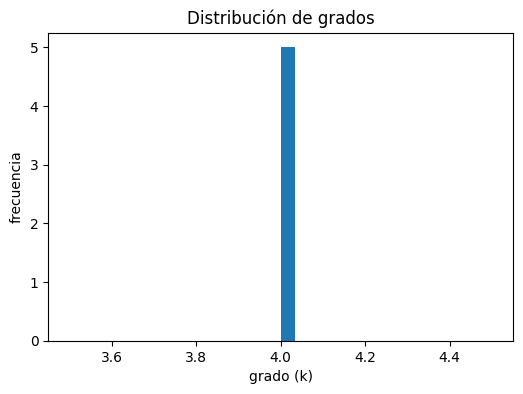

In [26]:
deg = dict(G.degree())
df_deg = pd.Series(deg, name="grado").to_frame()
display(df_deg.describe())

# Histograma
plt.figure(figsize=(6,4))
plt.hist(df_deg["grado"], bins=30)
plt.xlabel("grado (k)")
plt.ylabel("frecuencia")
plt.title("Distribución de grados")
plt.show()

La barra única en el valor 4 indica que todos los servicios tienen exactamente 4 conexiones (el número máximo posible en una red de 5 nodos, ya que cada nodo puede conectarse con los otros 4).

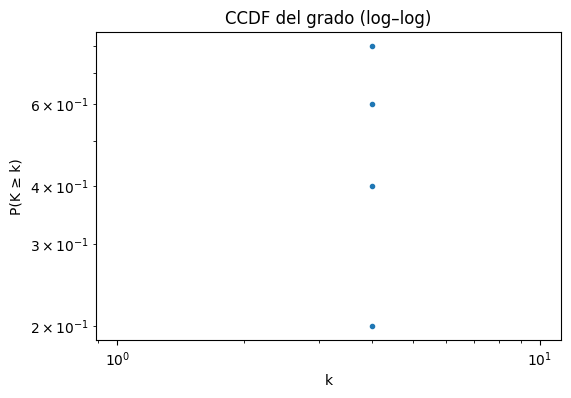

In [27]:
# CCDF (log–log)
vals = df_deg["grado"].values
vals_sorted = np.sort(vals)
ccdf_y = 1.0 - np.arange(1, len(vals_sorted)+1)/len(vals_sorted)

plt.figure(figsize=(6,4))
plt.loglog(vals_sorted, ccdf_y, marker='.', linestyle='none')
plt.xlabel("k")
plt.ylabel("P(K ≥ k)")
plt.title("CCDF del grado (log–log)")
plt.show()

La CCDF en escala log-log revela que todos los nodos presentan exactamente el mismo grado (k = 4), generando una distribución puntual y sin variación. Esto indica que la red no presenta propiedades de redes complejas reales como la autoorganización o la presencia de nodos altamente conectados (hubs). En cambio, se trata de una estructura completamente homogénea y simétrica donde todos los servicios están conectados entre sí.

## **4. Detección de Comunidades**

### Solo de servicios

In [28]:
# Cargar la red desde el archivo .pkl
with open('/content/redes_guardadas/principales/red_servicio_servicio_completa.pkl', 'rb') as f:
    G = pickle.load(f)

# Verificar si la red se cargó correctamente
print("Red cargada correctamente")
print("Número de nodos:", G.number_of_nodes())
print("Número de aristas:", G.number_of_edges())

Red cargada correctamente
Número de nodos: 7
Número de aristas: 20


In [29]:
# Aplicar el algoritmo de Girvan-Newman
comp = list(nx.community.girvan_newman(G))

# Mostrar las comunidades detectadas
print("Comunidades detectadas:")
for community in comp:
    print(community)

Comunidades detectadas:
({'SERV_6', 'SERV_4', 'SERV_7', 'SERV_2', 'SERV_1', 'SERV_5'}, {'SERV_3'})
({'SERV_6'}, {'SERV_3'}, {'SERV_1', 'SERV_7', 'SERV_2', 'SERV_4', 'SERV_5'})
({'SERV_6'}, {'SERV_3'}, {'SERV_1'}, {'SERV_4', 'SERV_7', 'SERV_2', 'SERV_5'})
({'SERV_6'}, {'SERV_3'}, {'SERV_1'}, {'SERV_4'}, {'SERV_7', 'SERV_2', 'SERV_5'})
({'SERV_6'}, {'SERV_3'}, {'SERV_1'}, {'SERV_4'}, {'SERV_2'}, {'SERV_7', 'SERV_5'})
({'SERV_6'}, {'SERV_3'}, {'SERV_1'}, {'SERV_4'}, {'SERV_2'}, {'SERV_7'}, {'SERV_5'})


In [30]:
# Verificar el contenido de la primera comunidad
print("Contenido de la comunidad:", comp[0])

Contenido de la comunidad: ({'SERV_6', 'SERV_4', 'SERV_7', 'SERV_2', 'SERV_1', 'SERV_5'}, {'SERV_3'})


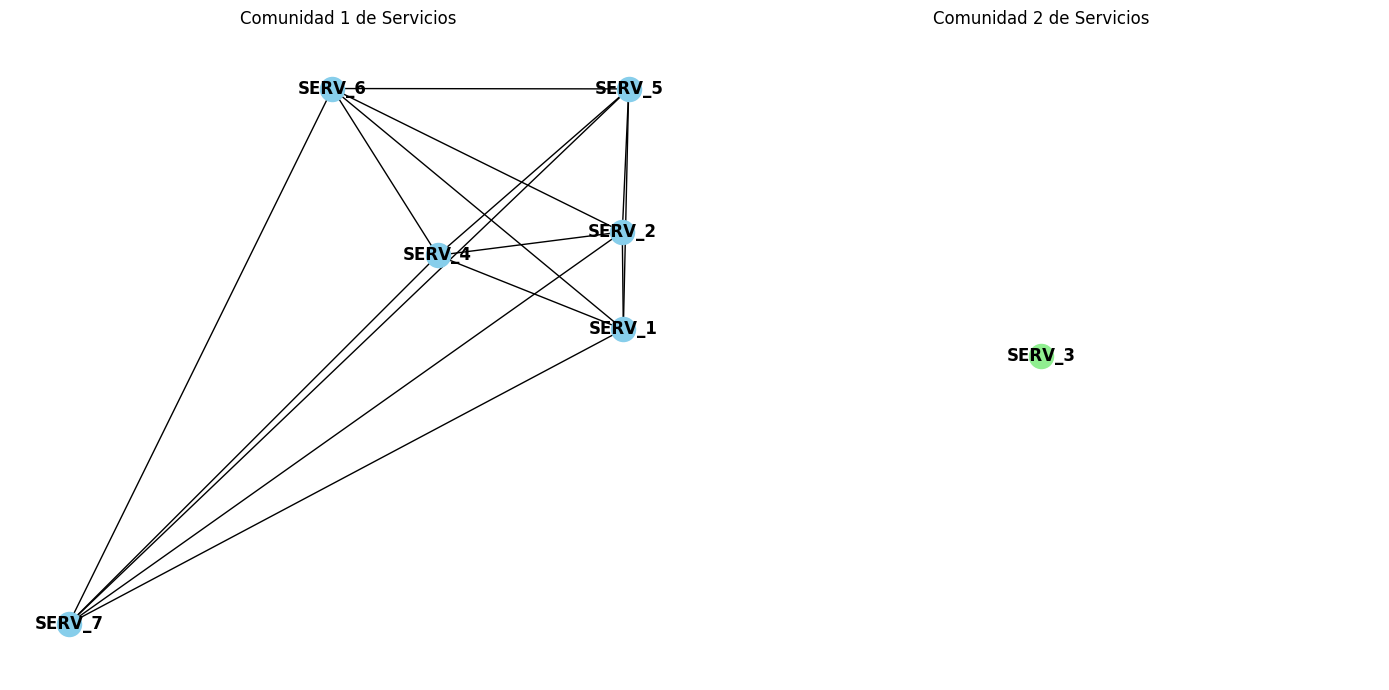

Las figuras de las comunidades han sido guardadas en 'figuras/comunidades/servicios'.


In [31]:
# La primera comunidad tiene varios servicios
community_1 = list(comp[0][0])  # Accedemos al primer conjunto
community_2 = list(comp[0][1])  # Accedemos al segundo conjunto

# Crear la carpeta 'figuras/comunidades' si no existe
figuras_path = 'figuras/comunidades/servicios'
if not os.path.exists(figuras_path):
    os.makedirs(figuras_path)

# Visualización de las dos comunidades en una fila (solo para Colab, no se guarda esta figura combinada)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))  # Dos subgráficos en una fila

# Visualización de la red de la primera comunidad (conjunto de varios servicios)
subgraph_1 = G.subgraph(community_1)
nx.draw(subgraph_1, with_labels=True, node_color='skyblue', font_weight='bold', ax=ax1)
ax1.set_title("Comunidad 1 de Servicios")

# Visualización de la red de la segunda comunidad (conjunto con un solo servicio)
subgraph_2 = G.subgraph(community_2)
nx.draw(subgraph_2, with_labels=True, node_color='lightgreen', font_weight='bold', ax=ax2)
ax2.set_title("Comunidad 2 de Servicios")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar la figura en Colab (no guardamos esta figura)
plt.show()

# Guardar la figura de la Comunidad 1 por separado
plt.figure(figsize=(8, 6))
nx.draw(subgraph_1, with_labels=True, node_color='skyblue', font_weight='bold')
plt.title("Comunidad 1 de Servicios")
plt.savefig(f'{figuras_path}/comunidad_1.png', format='png')
plt.close()  # Cerrar la figura para liberar memoria

# Guardar la figura de la Comunidad 2 por separado
plt.figure(figsize=(8, 6))
nx.draw(subgraph_2, with_labels=True, node_color='lightgreen', font_weight='bold')
plt.title("Comunidad 2 de Servicios")
plt.savefig(f'{figuras_path}/comunidad_2.png', format='png')
plt.close()  # Cerrar la figura para liberar memoria

# Confirmación de que las figuras fueron guardadas
print("Las figuras de las comunidades han sido guardadas en 'figuras/comunidades/servicios'.")


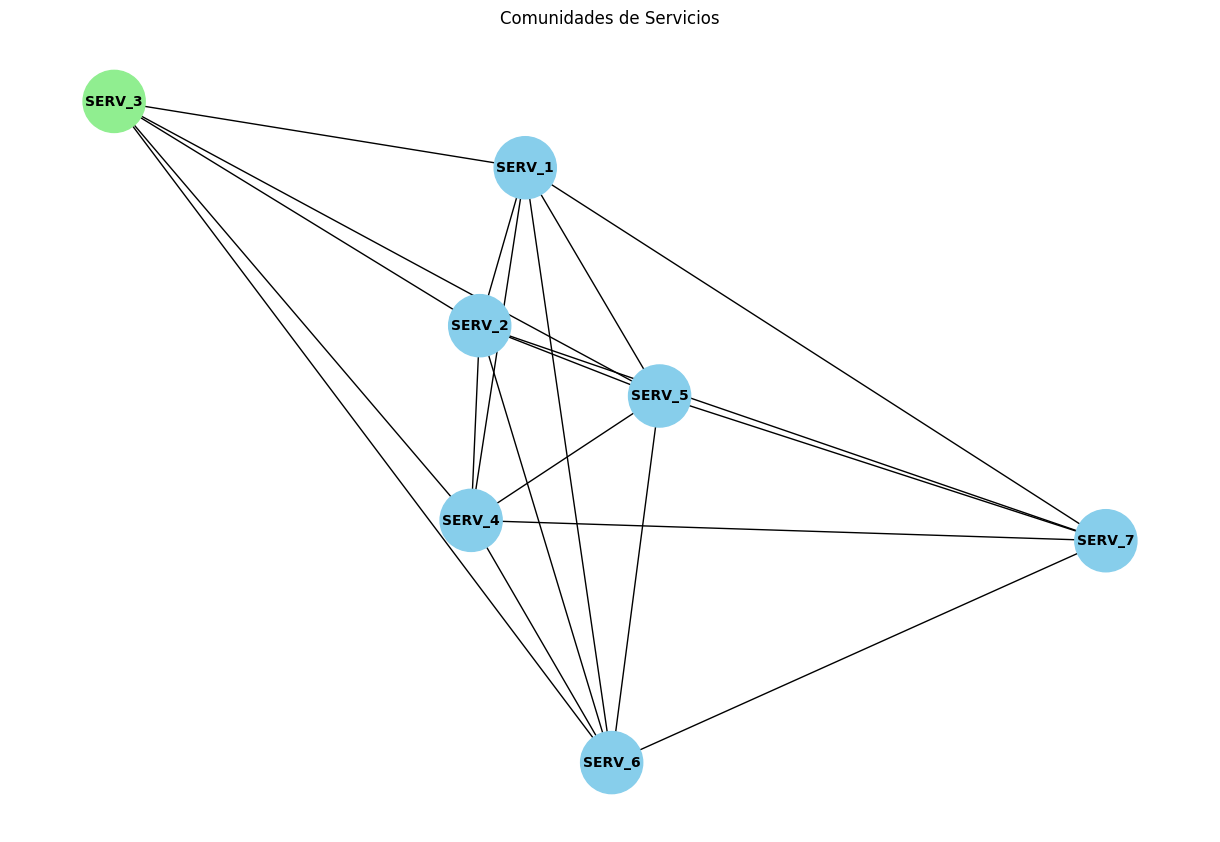

La figura en conjunto ha sido guardada en 'figuras/comunidades/servicios'.


In [32]:
# Crear un subgrafo con todas las comunidades
subgraph = G.subgraph(community_1 + community_2)  # Unimos ambas comunidades

# Asignar colores a cada nodo según la comunidad
color_map = []
for node in subgraph.nodes():
    if node in community_1:
        color_map.append('skyblue')  # Comunidad 1 en azul
    else:
        color_map.append('lightgreen')  # Comunidad 2 en verde

# Dibujar la subred de las comunidades en conjunto
plt.figure(figsize=(12, 8))
nx.draw(subgraph, with_labels=True, node_color=color_map, font_weight='bold', node_size=2000, font_size=10)
plt.title("Comunidades de Servicios")

# Guardar la figura de las comunidades en conjunto
plt.savefig(f'{figuras_path}/comunidades_conjunto.png', format='png')

# Mostrar la figura de las comunidades en conjunto
plt.show()

# Confirmación de que las figuras fueron guardadas
print("La figura en conjunto ha sido guardada en 'figuras/comunidades/servicios'.")

In [33]:
# Crear la carpeta 'redes_guardadas/extras' si no existe
if not os.path.exists('redes_guardadas/extras/comunidades'):
    os.makedirs('redes_guardadas/extras/comunidades')

# Guardar las comunidades detectadas en la carpeta 'redes_guardadas/extras'
with open('redes_guardadas/extras/comunidades/comunidades_detectadas_servicios.pkl', 'wb') as f:
    pickle.dump(comp[0], f)  # Guardamos las comunidades detectadas (comp[0] contiene las dos comunidades)

# Confirmación de que se guardaron las comunidades
print("Comunidades guardadas correctamente en 'redes_guardadas/extras/comunidades'.")

Comunidades guardadas correctamente en 'redes_guardadas/extras/comunidades'.


Hemos decidido realizar la detección de comunidades utilizando el algoritmo Girvan-Newman, con el objetivo de identificar grupos de servicios que suelen ser consumidos juntos por los clientes. Este algoritmo nos permitió dividir la red de servicios en varias comunidades, donde cada comunidad representa un grupo de servicios que tienen fuertes conexiones entre sí.

Los resultados obtenidos mostraron que la red se fragmentó en dos comunidades principales. La primera comunidad agrupa varios servicios, como SERV_1, SERV_2, SERV_3, SERV_4, SERV_5 y SERV_6, que están más estrechamente relacionados entre sí, mientras que la segunda comunidad consistió solo en SERV_7, un servicio que está menos conectado con los demás.

Este hallazgo es importante porque sugiere que algunos servicios son consumidos en conjunto de manera regular, mientras que otros podrían ser más independientes o especializados. La aplicación del algoritmo Girvan-Newman nos proporcionó una visión clara de cómo los servicios se agrupan según las interacciones de los clientes, lo que abre oportunidades para mejorar la personalización de ofertas o estrategias de marketing dirigidas a estos grupos específicos de servicios.

En resumen, el uso del algoritmo Girvan-Newman fue clave para revelar las relaciones de co-utilización dentro de la red de servicios y nos ayudó a identificar dos comunidades distintas, lo que aporta un valor significativo al análisis de patrones de consumo entre los servicios.

## **5. Link Prediction**

In [38]:
import networkx as nx
import random
import pickle
import numpy as np
from sklearn.metrics import roc_auc_score

# ---------------------------------------
# 1. Cargar el grafo
# ---------------------------------------
with open("/content/redes_guardadas/principales/red_servicio_servicio_completa.pkl", "rb") as f:
    G = pickle.load(f)

print("Nodos:", G.number_of_nodes())
print("Aristas:", G.number_of_edges())
# Asegurar que sea grafo simple
G = nx.Graph(G)

# ---------------------------------------
# 2. Crear train/test (remover el 20% de aristas)
# ---------------------------------------
edges = list(G.edges())
random.shuffle(edges)

test_size = int(0.2 * len(edges))
test_edges = edges[:test_size]
train_edges = edges[test_size:]

G_train = G.copy()
G_train.remove_edges_from(test_edges)

# Asegurar que no queden nodos aislados (opcional)
G_train.remove_nodes_from(list(nx.isolates(G_train)))

print("Train edges:", len(train_edges))
print("Test edges:", len(test_edges))

# ---------------------------------------
# 3. Generar non-edges para evaluación
# ---------------------------------------
non_edges = list(nx.non_edges(G))
random.shuffle(non_edges)
neg_test_edges = non_edges[:test_size]

# ---------------------------------------
# 4. Predictores clásicos NetworkX
# ---------------------------------------

def score_method(method_fn, graph, pairs):
    """Calcula los scores de un método NX para pares dados."""
    predictions = method_fn(graph, pairs)
    scores = {}
    for u, v, p in predictions:
        scores[(u, v)] = p
    return [scores.get((u, v), 0) for (u, v) in pairs]

# Métodos
methods = {
    "Adamic-Adar": nx.adamic_adar_index,
    "Jaccard": nx.jaccard_coefficient,
    "Preferential-Attachment": nx.preferential_attachment,
    "Resource-Allocation": nx.resource_allocation_index
}

# ---------------------------------------
# 5. Evaluar AUC
# ---------------------------------------
results = {}

for name, method in methods.items():
    pos_scores = score_method(method, G_train, test_edges)
    neg_scores = score_method(method, G_train, neg_test_edges)

    y_true = [1]*len(pos_scores) + [0]*len(neg_scores)
    y_scores = pos_scores + neg_scores

    auc = roc_auc_score(y_true, y_scores)
    results[name] = auc

# Mostrar resultados
print("\nAUC de cada método:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")

# ---------------------------------------
# 6. Precision@k
# ---------------------------------------
def precision_at_k(graph, method_fn, k=50):
    all_non_edges = list(nx.non_edges(graph))
    predictions = list(method_fn(graph, all_non_edges))
    predictions_sorted = sorted(predictions, key=lambda x: x[2], reverse=True)

    top_k = predictions_sorted[:k]
    correct = sum([1 for u, v, p in top_k if G.has_edge(u, v)])  # verificar en grafo real

    return correct / k

print("\nPrecision@50")
for name, method in methods.items():
    p_at_50 = precision_at_k(G_train, method, k=50)
    print(f"{name}: {p_at_50:.4f}")

Nodos: 7
Aristas: 20
Train edges: 16
Test edges: 4

AUC de cada método:
Adamic-Adar: 0.5000
Jaccard: 0.6250
Preferential-Attachment: 0.3750
Resource-Allocation: 0.5000

Precision@50
Adamic-Adar: 0.0800
Jaccard: 0.0800
Preferential-Attachment: 0.0800
Resource-Allocation: 0.0800
